# Analyze Tournament Site Location Data

## Import data and packages

In [310]:
import pandas as pd

data = pd.read_csv('../data/cleaned/distances-schools.csv')
display(data.head())

,seed,school_common_name,site,year,id,school_full_name,team,city,state,type,conference,address,lng,lat,geometry,distance
0,1.0,Duke,"Columbia, SC",2019.0,20190,Duke University,Blue Devils,Durham,North Carolina,Private/Non-sectarian,Atlantic Coast Conference,Duke University Durham North Carolina,-78.944230,36.000156,POINT (-78.94422972195878 36.00015569999999),179.765685
1,1.0,Gonzaga,"Salt Lake City, UT",2019.0,20191,Gonzaga University,Bulldogs,Spokane,Washington,Private/Catholic,West Coast Conference,Gonzaga University Spokane Washington,-117.403044,47.666739,POINT (-117.4030438539681 47.66673855000001),549.380264
2,1.0,North Carolina,"Columbus, OH",2019.0,20192,University of North Carolina at Chapel Hill,Tar Heels,Chapel Hill,North Carolina,State,Atlantic Coast Conference,University of North Carolina at Chapel Hill Ch...,-79.047753,35.905035,POINT (-79.04775326525106 35.90503535),352.052893
3,1.0,Virginia,"Columbia, SC",2019.0,20193,University of Virginia,Cavaliers,Charlottesville,Virginia,State,Atlantic Coast Conference,University of Virginia Charlottesville Virginia,-78.505500,38.041058,POINT (-78.50549960183569 38.0410576),296.237023
4,2.0,Michigan State,"Des Moines, IA",2019.0,20194,Michigan State University,Spartans,East Lansing,Michigan,State,Big Ten Conference,Michigan State University East Lansing Michigan,-84.477916,42.718568,POINT (-84.47791570930522 42.71856800000001),571.484627


In [311]:
# data.to_json('../data/cleaned/tourney-data.json', orient='records')
# data['weighted_dist'] = []
weights = {1: 1, 2: 0.75, 3: 0.5, 4: 0.25}
weightedMean = []
for i, dist in enumerate(data.distance):
#     print(dist)
#     print(weights[data.seed[i]])
    weightedMean.append(dist * weights[data.seed[i]])
weightedMean
data['weightedDist'] = weightedMean
data

,seed,school_common_name,site,year,id,school_full_name,team,city,state,type,conference,address,lng,lat,geometry,distance,weightedDist
0,1.0,Duke,"Columbia, SC",2019.0,20190,Duke University,Blue Devils,Durham,North Carolina,Private/Non-sectarian,Atlantic Coast Conference,Duke University Durham North Carolina,-78.944230,36.000156,POINT (-78.94422972195878 36.00015569999999),179.765685,179.765685
1,1.0,Gonzaga,"Salt Lake City, UT",2019.0,20191,Gonzaga University,Bulldogs,Spokane,Washington,Private/Catholic,West Coast Conference,Gonzaga University Spokane Washington,-117.403044,47.666739,POINT (-117.4030438539681 47.66673855000001),549.380264,549.380264
2,1.0,North Carolina,"Columbus, OH",2019.0,20192,University of North Carolina at Chapel Hill,Tar Heels,Chapel Hill,North Carolina,State,Atlantic Coast Conference,University of North Carolina at Chapel Hill Ch...,-79.047753,35.905035,POINT (-79.04775326525106 35.90503535),352.052893,352.052893
3,1.0,Virginia,"Columbia, SC",2019.0,20193,University of Virginia,Cavaliers,Charlottesville,Virginia,State,Atlantic Coast Conference,University of Virginia Charlottesville Virginia,-78.505500,38.041058,POINT (-78.50549960183569 38.0410576),296.237023,296.237023
4,2.0,Michigan State,"Des Moines, IA",2019.0,20194,Michigan State University,Spartans,East Lansing,Michigan,State,Big Ten Conference,Michigan State University East Lansing Michigan,-84.477916,42.718568,POINT (-84.47791570930522 42.71856800000001),571.484627,428.613470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,3.0,NC State,"Albuquerque, NM",1985.0,1985555,North Carolina State University,Wolfpack,Raleigh,North Carolina,State,Atlantic Coast Conference,North Carolina State University Raleigh North ...,-78.674087,35.771850,POINT (-78.67408695452633 35.77184965),1739.300819,869.650410
556,4.0,Loyola–Chicago,"Hartford, CT",1985.0,1985556,Loyola University Chicago,Ramblers,Chicago,Illinois,Private/Catholic,Missouri Valley Conference,Loyola University Chicago Chicago Illinois,-87.668422,41.944842,POINT (-87.66842176669064 41.94484179999999),930.929259,232.732315
557,4.0,Ohio State,"Tulsa, OK",1985.0,1985557,The Ohio State University,Buckeyes,Columbus,Ohio,State,Big Ten Conference,The Ohio State University Columbus Ohio,-83.028663,40.005709,POINT (-83.02866259769122 40.00570905),840.512615,210.128154
558,4.0,LSU,"Dayton, OH",1985.0,1985558,Louisiana State University,Tigers,Baton Rouge,Louisiana,State,Southeastern Conference,Louisiana State University Baton Rouge Louisiana,-91.185968,30.405709,POINT (-91.18596767189877 30.40570885),725.868192,181.467048


In [317]:
wSchool = data.groupby('school_common_name').describe()
x = wSchool.weightedDist.sort_values(by=['mean'])
x

,count,mean,std,min,25%,50%,75%,max
school_common_name,,,,,,,,
DePaul,1.0,7.203392,NaN,7.203392,7.203392,7.203392,7.203392,7.203392
La Salle,1.0,46.742337,NaN,46.742337,46.742337,46.742337,46.742337,46.742337
Butler,1.0,56.582269,NaN,56.582269,56.582269,56.582269,56.582269,56.582269
Southern Illinois,1.0,102.636974,NaN,102.636974,102.636974,102.636974,102.636974,102.636974
Clemson,2.0,111.511783,118.047497,28.039598,69.775690,111.511783,153.247876,194.983968
...,...,...,...,...,...,...,...,...
Seton Hall,4.0,778.182929,505.062064,112.649327,522.242636,914.221284,1170.161577,1171.639820
USC,2.0,781.494935,982.689063,86.628835,434.061885,781.494935,1128.927985,1476.361035
Stanford,8.0,811.707855,696.429024,173.194292,364.331846,553.266875,1141.144455,2211.465583


In [322]:
# print (df.drop_duplicates(['Cat']))
d = data.drop_duplicates(['school_common_name']).drop(['distance', 'seed', 'site', 'id', 'geometry'], axis=1)
d

m = pd.merge(d, x, how='left', left_on='school_common_name', right_on=x.index.get_level_values('school_common_name'))
m

y = m.sort_values(by=['mean'], ascending=False)
y

,school_common_name,year,school_full_name,team,city,state,type,conference,address,lng,lat,weightedDist,count,mean,std,min,25%,50%,75%,max
85,VCU,1985.0,Virginia Commonwealth University,Rams,Richmond,Virginia,State,Atlantic 10 Conference,Virginia Commonwealth University Richmond Virg...,-77.453064,37.548215,1365.835010,1.0,1365.835010,NaN,1365.835010,1365.835010,1365.835010,1365.835010,1365.835010
73,St. John's,2000.0,St. John's University,Red Storm,Jamaica,New York,Private/Catholic,Big East Conference,St. John's University Jamaica New York,-73.990073,40.729944,1768.981231,5.0,1211.821585,912.656653,159.223749,442.906099,1332.699363,1768.981231,2355.297484
55,Stanford,2008.0,Stanford University,Cardinal,Palo Alto,California,Private/Non-Sectarian,Pac-12 Conference,Stanford University Palo Alto California,-122.169365,37.431314,173.194292,8.0,811.707855,696.429024,173.194292,364.331846,553.266875,1141.144455,2211.465583
70,USC,2002.0,University of Southern California,Trojans,Los Angeles,California,Private/Non-Sectarian,Pac-12 Conference,University of Southern California Los Angeles ...,-118.285867,34.021883,86.628835,2.0,781.494935,982.689063,86.628835,434.061885,781.494935,1128.927985,1476.361035
79,Seton Hall,1993.0,Seton Hall University,Pirates,South Orange,New Jersey,Private/Catholic,Big East Conference,Seton Hall University South Orange New Jersey,-74.246858,40.743372,658.773739,4.0,778.182929,505.062064,112.649327,522.242636,914.221284,1170.161577,1171.639820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Clemson,1997.0,Clemson University,Tigers,Clemson,South Carolina,State,Atlantic Coast Conference,Clemson University Clemson South Carolina,-82.837435,34.668692,194.983968,2.0,111.511783,118.047497,28.039598,69.775690,111.511783,153.247876,194.983968
57,Southern Illinois,2007.0,Southern Illinois University Carbondale,Salukis,Carbondale,Illinois,State,Missouri Valley Conference,Southern Illinois University Carbondale Carbon...,-89.215122,37.722501,102.636974,1.0,102.636974,NaN,102.636974,102.636974,102.636974,102.636974,102.636974
27,Butler,2017.0,Butler University,Bulldogs,Indianapolis,Indiana,Private/Non-Sectarian,Big East Conference,Butler University Indianapolis Indiana,-86.173749,39.840719,56.582269,1.0,56.582269,NaN,56.582269,56.582269,56.582269,56.582269,56.582269
82,La Salle,1990.0,La Salle University,Explorers,Philadelphia,Pennsylvania,Private/Catholic,Atlantic 10 Conference,La Salle University Philadelphia Pennsylvania,-75.154018,40.037470,46.742337,1.0,46.742337,NaN,46.742337,46.742337,46.742337,46.742337,46.742337


In [323]:
y.to_csv('../data/cleaned/test-default-wtAvg.csv')

count     560.000000
mean      647.894457
std       661.450550
min         0.387824
25%       211.343978
50%       416.894154
75%       807.022801
max      3882.415905
Name: distance, dtype: float64

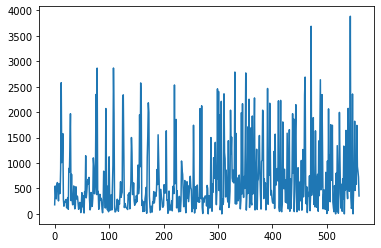

In [47]:
data.distance.plot()
data.distance.describe()

In [50]:
import matplotlib
%matplotlib inline

seed = data.groupby('seed').describe()
seed.distance
data.groupby('seed').distance.median()

seed
1.0    243.041596
2.0    336.853440
3.0    520.265933
4.0    665.624166
Name: distance, dtype: float64

In [160]:
school = data.groupby('school_common_name').describe()
school.distance.head()

# print (df.drop_duplicates(['Cat']))
d = data.drop_duplicates(['school_common_name']).drop(['distance', 'seed', 'site', 'id', 'geometry'], axis=1)
d

m = pd.merge(d, school.distance, how='left', left_on='school_common_name', right_on=school.distance.index.get_level_values('school_common_name'))
m

# df.sort_values(by=['col1'])
m.sort_values(by=['mean'])

# x = school.distance
# x['name'] = school.distance.index.get_level_values('school_common_name')
# # school.loc[school.distance, 'name'] = school.distance.index.get_level_values('school_common_name')
# x

# s = pd.merge(x, data, how='right', left_on='name', right_on='school_common_name')
# s
# # m = pd.merge(x, data, how='right', left_on='name', right_on='school_common_name')
# # # m = pd.merge(data, school.distance, how='left', left_on='school_common_name', right_on=school.distance.index.get_level_values('school_common_name'))
# # # m = m.drop(['distance'], axis=1)
# # m
# # # print(m)

# # m.to_json('../data/cleaned/school-mean.json', orient='records')
# # school.distance[school.distance.index.get_level_values('school_common_name') == 'Kentucky']

,school_common_name,year,school_full_name,team,city,state,type,conference,address,lng,lat,count,mean,std,min,25%,50%,75%,max
83,DePaul,1987.0,DePaul University,Blue Demons,Chicago,Illinois,Private/Catholic,Big East Conference,DePaul University Chicago Illinois,-87.654726,41.924020,1.0,14.406784,NaN,14.406784,14.406784,14.406784,14.406784,14.406784
82,La Salle,1990.0,La Salle University,Explorers,Philadelphia,Pennsylvania,Private/Catholic,Atlantic 10 Conference,La Salle University Philadelphia Pennsylvania,-75.154018,40.037470,1.0,186.969348,NaN,186.969348,186.969348,186.969348,186.969348,186.969348
68,Alabama,2002.0,University of Alabama,Crimson Tide,Tuscaloosa,Alabama,State,Southeastern Conference,University of Alabama Tuscaloosa Alabama,-87.539674,33.212082,3.0,194.538449,142.894640,49.672095,124.119584,198.567073,266.971626,335.376179
27,Butler,2017.0,Butler University,Bulldogs,Indianapolis,Indiana,Private/Non-Sectarian,Big East Conference,Butler University Indianapolis Indiana,-86.173749,39.840719,1.0,226.329078,NaN,226.329078,226.329078,226.329078,226.329078,226.329078
3,Virginia,2019.0,University of Virginia,Cavaliers,Charlottesville,Virginia,State,Atlantic Coast Conference,University of Virginia Charlottesville Virginia,-78.505500,38.041058,6.0,233.604168,89.021514,140.746063,162.400271,227.362896,279.018491,369.170067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,Vanderbilt,2010.0,Vanderbilt University,Commodores,Nashville,Tennessee,Private/Non-Sectarian,Southeastern Conference,Vanderbilt University Nashville Tennessee,-86.802819,36.143801,4.0,1631.407918,757.446810,576.522270,1332.996267,1883.565917,2181.977569,2181.977569
85,VCU,1985.0,Virginia Commonwealth University,Rams,Richmond,Virginia,State,Atlantic 10 Conference,Virginia Commonwealth University Richmond Virg...,-77.453064,37.548215,1.0,1821.113346,NaN,1821.113346,1821.113346,1821.113346,1821.113346,1821.113346
46,Saint Louis,2013.0,Saint Louis University,Billikens,St. Louis,Missouri,Private/Catholic,Atlantic 10 Conference,Saint Louis University St. Louis Missouri,-90.231677,38.635284,1.0,1969.269626,NaN,1969.269626,1969.269626,1969.269626,1969.269626,1969.269626
67,Dayton,2003.0,University of Dayton,Flyers,Dayton,Ohio,Private/Catholic,Atlantic 10 Conference,University of Dayton Dayton Ohio,-84.179195,39.738460,1.0,2123.826607,NaN,2123.826607,2123.826607,2123.826607,2123.826607,2123.826607


In [159]:
m.to_json('../data/cleaned/schools-default.json')
m.to_csv('../data/cleaned/schools-default.csv', index=False)


# with open('../data/cleaned/schools-default.json', 'w') as f:
#     f.write(m.to_json())

In [21]:
conf = data.groupby('conference').describe()
conf.distance

,count,mean,std,min,25%,50%,75%,max
conference,,,,,,,,
American Athletic Conference,35.0,544.024159,584.435745,27.304459,214.571640,348.141829,630.326868,2464.060520
Atlantic 10 Conference,11.0,969.521764,958.868496,45.877546,132.428889,288.715757,1895.191486,2278.013061
Atlantic Coast Conference,139.0,600.824508,703.691371,1.068547,127.422660,345.194626,658.086142,2865.829390
Big 12 Conference,78.0,544.735037,402.353783,17.777579,219.233497,454.134239,773.462956,1631.984883
Big East Conference,44.0,667.392697,743.839563,12.131191,234.536763,375.350575,765.596346,2863.666650
Big Ten Conference,94.0,694.419396,697.891750,8.249110,151.786305,423.744431,915.353168,2768.812156
Missouri Valley Conference,2.0,670.738577,367.965190,410.547896,540.643237,670.738577,800.833918,930.929259
Mountain West Conference,13.0,909.176700,1001.203972,231.150318,352.895410,471.334497,959.302768,3882.415905
Pac-12 Conference,59.0,865.894042,784.995125,0.387824,369.559704,533.457641,1079.386584,3685.275858


In [287]:
def wavg(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    
    weights = {1: 1, 2: 0.75, 3: 0.5, 4: 0.25}

#     print(weights)
#     print(str(d))
    try:
        return (weights[d] * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

data.groupby(['school_common_name']).apply(wavg, 'seed', 'distance')
# tmp = data.groupby(['school_common_name', 'seed']).describe()

#In [12]: df.iloc[df.index.get_level_values('A') == 1]
# display(tmp.distance[tmp.distance.index.get_level_values('school_common_name') == 'Kentucky'])
# school.distance[school.distance.index.get_level_values('school_common_name') == 'Kentucky']
# tmp.distance


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [268]:
# ((450*10*1) + (381 * 7 * 0.75) + (628*2*0.5) + (535*3*0.25)) / 22

# [tmp.distance[tmp.distance.index.get_level_values('school_common_name') == i] for i in tmp.distance.index.get_level_values('school_common_name')]
seed = tmp.distance.index.get_level_values('seed')
school = tmp.distance.index.get_level_values('school_common_name')
# for i in school:
#      if 1 not in seed[school == i]:
#         s3 = pd.Series([4, 5, 6], index=[3, 4, 5])
#         df = pd.Series([0,0,0,0,0,0,0,0], index=[i, 1])
#         print(df)

#             dfObj.loc['k'] = ['Smriti', 26, 'Bangalore', 'India']
#         tmp.distance.loc['1'] = [0,0,0,0,0,0,0,0]
#         df = pd.DataFrame([0], columns=list('count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max')) 
#         df = pd.DataFrame({'count': 0, 'mean': 0, 'std': 0, 'min': 0, '25%': 0, '50%': 0, '75%': 0, 'max': 0})
# modDfObj = dfObj.append({'Name' : 'Sahil' , 'Age' : 22} , ignore_index=True)
#         tmp.distance.append({'count': 0, 'mean': 0, 'std': 0, 'min': 0, '25%': 0, '50%': 0, '75%': 0, 'max': 0}, ignore_index=False)
#         print(seed[school == i])
# tmp.distance

x = tmp.distance
x['school'] = x.index.get_level_values('school_common_name')
x['seed'] = x.index.get_level_values('seed')
x.loc[x.school == 'Alabama']

<ipython-input-268-f82cb510f2c5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['school'] = x.index.get_level_values('school_common_name')
<ipython-input-268-f82cb510f2c5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['seed'] = x.index.get_level_values('seed')


count        mean         std         min  \
school_common_name seed                                              
Alabama            2.0     2.0  192.524137  202.023295   49.672095   
                   4.0     1.0  198.567073         NaN  198.567073   

                                25%         50%         75%         max  \
school_common_name seed                                                   
Alabama            2.0   121.098116  192.524137  263.950158  335.376179   
                   4.0   198.567073  198.567073  198.567073  198.567073   

                          school  seed  
school_common_name seed                 
Alabama            2.0   Alabama   2.0  
                   4.0   Alabama   4.0

In [63]:
display(tmp.distance[tmp.distance.index.get_level_values('school_common_name') == 'Duke'])
school.distance[school.distance.index.get_level_values('school_common_name') == 'Duke']

count        mean         std         min  \
school_common_name seed                                              
Duke               1.0    14.0  142.136302  114.914600   23.370403   
                   2.0    11.0  270.183865  305.620735    8.792190   
                   3.0     5.0  843.743833  789.577391   23.370403   
                   4.0     1.0  591.699762         NaN  591.699762   

                                25%         50%          75%          max  
school_common_name seed                                                    
Duke               1.0    52.879953  127.422660   166.679929   390.499009  
                   2.0    52.879953  215.463324   311.765414  1050.483423  
                   3.0   366.243031  668.509750  1091.944017  2068.651965  
                   4.0   591.699762  591.699762   591.699762   591.699762

,count,mean,std,min,25%,50%,75%,max
school_common_name,,,,,,,,
Duke,31.0,315.237086,428.730315,8.79219,52.879953,127.42266,367.019606,2068.651965


In [64]:
((14*142*1)+(11*270*0.75)+(5*843*.5)+(1*591*0.25)) / 31

208.73387096774192

In [66]:
tmp.distance[tmp.distance.index.get_level_values('school_common_name') == 'Kansas']

count        mean         std         min  \
school_common_name seed                                              
Kansas             1.0    14.0  335.734603  222.521720   42.542538   
                   2.0     7.0  457.954089  351.355571  149.292054   
                   3.0     3.0  478.032214  190.179024  258.469820   
                   4.0     5.0  644.803337  367.563468   42.542538   

                                25%         50%         75%          max  
school_common_name seed                                                   
Kansas             1.0   180.221004  258.469820  480.582796   688.944254  
                   2.0   203.880937  311.741554  621.976607  1092.929925  
                   3.0   421.386069  584.302318  587.813411   591.324504  
                   4.0   670.559068  688.944254  781.803429  1040.167396

In [36]:
tmp.distance[tmp.distance.index.get_level_values('school_common_name') == 'North Carolina']

count         mean          std         min  \
school_common_name seed                                                
North Carolina     1.0    14.0   173.584449   169.329781   26.553060   
                   2.0     7.0   640.371667   670.759162  119.273414   
                   3.0     3.0  1752.966507  1225.273577  399.467443   
                   4.0     2.0   387.935215     7.823261  382.403335   

                                 25%          50%          75%          max  
school_common_name seed                                                      
North Carolina     1.0     54.391445    97.301448   227.746760   537.320513  
                   2.0    238.662342   470.350619   676.256223  2063.140505  
                   3.0   1236.178211  2072.888978  2429.716039  2786.543099  
                   4.0    385.169275   387.935215   390.701156   393.467096

In [37]:
tmp.distance[tmp.distance.index.get_level_values('school_common_name') == 'Michigan State']

count         mean         std         min  \
school_common_name seed                                               
Michigan State     1.0     5.0   320.757808  176.167537  188.773963   
                   2.0     2.0   504.913264   94.146125  438.341901   
                   3.0     3.0   310.937264  391.858249   77.327536   
                   4.0     2.0  1402.646059  944.242151  734.966031   

                                 25%          50%          75%          max  
school_common_name seed                                                      
Michigan State     1.0    194.356748   214.983495   421.446793   584.228041  
                   2.0    471.627582   504.913264   538.198945   571.484627  
                   3.0     84.738260    92.148984   427.742128   763.335272  
                   4.0   1068.806045  1402.646059  1736.486073  2070.326087